## Introduction to random forest model

Link to the Youtube video tutorial: https://www.youtube.com/watch?v=ok2s1vV9XW0&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=12


**In this example:**  <br />
1) A random forest model (machine learning model) is utilized for classification tasks.  <br /> 
2) The independent variables (features) of this dataset are the data available in the attribute of data.  <br />
3) The dependent variable (ground truth/target) of this dataset is the data available in the attribute of target (conveys the message of what number does the image with the given features belong to?)  <br />
4) The dependent variable is a categorical variable  <br />


**Basic ideas before learning the theory behind random forest model:**  <br />
1) A forest has trees, and a tree in machine learning world means a decision tree.  <br />
2) Example of a decision tree:  <br />
<img src="hidden\decision-tree.png" alt="This image a decision tree" style="width: 400px;"/>  <br />

3) Represent the same decision tree in a very simple image (build the same decision tree using green samples [samples with TRUE answer] & red samples [samples with FALSE answer]):  <br />
<img src="hidden\decision-tree-simple.png" alt="This image describes a decision tree" style="width: 400px;"/>  <br />

**Theory behind random forest model:**  <br />
1) Take the dataset and then you randomly (random sampling) divide it into a batch of datasets. The datasets generated now are called random datasets.  <br />
<img src="hidden\rd-datasets-batch.png" alt="This image describes dividing a dataset into a batch of random datasets" style="width: 400px;"/>  <br />

2) Then, you build a decision tree for each random dataset generated.  <br />
<img src="hidden\rd-datasets-batch2.png" alt="This image describes dividing a dataset into a batch of random datasets" style="width: 400px;"/>  <br />

3) Now we have multiple trees which form a forest. Since we did random sampling in dividing the dataset previously, the forest is called a random forest.  <br />
4) Once the random forest is trained, you give the random forest the thing that you want to predict. Then, all the decision trees of the random forest will provide different decisions.  <br />
<img src="hidden\rd-datasets-batch3.png" alt="This image describes dividing a dataset into a batch of random datasets" style="width: 400px;"/>  <br />

5) You just take the majority out of all the different decisions provided by the decision trees of the random forest as the final decision. In other words, the final decision is the output provided by the random forest algorithm.  <br />
<img src="hidden\rd-datasets-batch4.png" alt="This image describes dividing a dataset into a batch of random datasets" style="width: 400px;"/>  <br />
    
### Load the dataset

In [35]:
import pandas as pd
from sklearn.datasets import load_digits

# load the dataset
digits = load_digits()

### Dataset visualization

#### Show what the loaded dataset contains (the attributes of the dataset)

In [36]:
'''
the data of the dataset (under digits) contains the numerical data corresponding to each of the images of the dataset, 
the images of the dataset (under digits) contains the actual image corresponding to each of the numerical data,
the target of the dataset (under digits) contains the label (EG: The value shown by an image) corresponding to each of the actual images/numerical data.
When use the dataset to train a machine learning model, the data of the datast (under digits) is the independent variable (feature),
while the target of the dataset (under digits) is the dependent variable (ground truth)  
'''
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


#### Show the actual image of the first four images of the dataset

<Figure size 640x480 with 0 Axes>

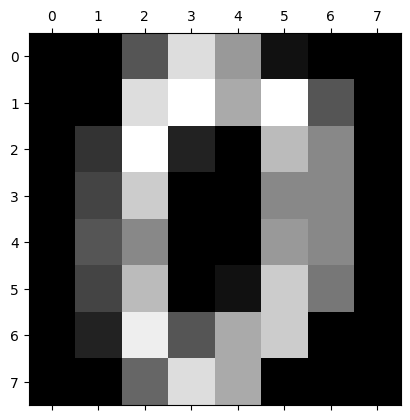

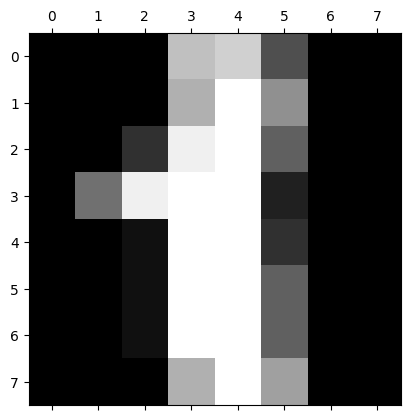

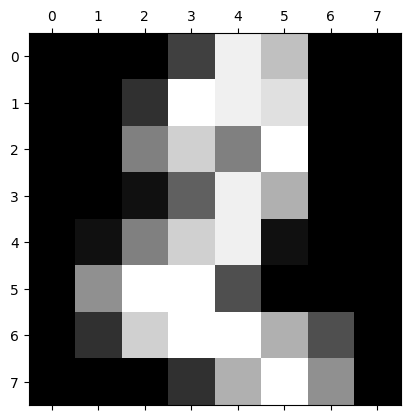

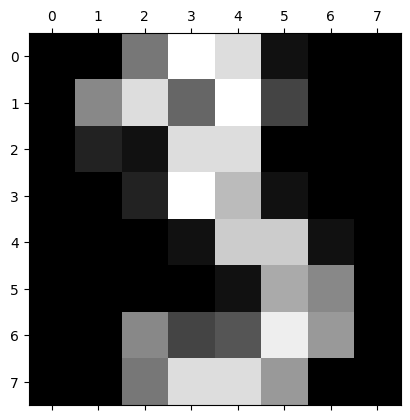

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

# set the colormap to "gray"
plt.gray()

# show the actual images of first 4 data of the dataset
for i in range(4):
    plt.matshow(digits.images[i])

#### Creata a dataframe with the independent variables of the dataset

In [38]:
# create a dataframe called df. Load the data available in the attribute of data of the dataset to the df dataframe.
df = pd.DataFrame(digits.data)

# show the first 5 rows of df dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### Add a column of the dependent variable of the dataset to the dataframe

In [39]:
# create a new column called target on df dataframe. Load the data available in the attribute of target of the dataset to the newly created target column of the df dataframe.
df['target']=digits.target

# show the first 5 rows of df dataframe
df.head()

'''
Each row represents a sample.
There are 64 features for each sample of this dataset. The 64 features is the 1D numerical array representation of each image with 8x8 size (8x8=64) of the dataset
Each row of the target column contains the numerical labels shown by each image/sample 
'''

'\nEach row represents a sample.\nThere are 64 features for each sample of this dataset. The 64 features is the 1D numerical array representation of each image with 8x8 size (8x8=64) of the dataset\nEach row of the target column contains the numerical labels shown by each image/sample \n'

### Data preprocessing

#### Show the name of all labels/categories available in the dependent variable of the dataset as a list in ascending order

This list will be used as the parameter of labels of the confusion matrix at later stage

In [40]:
import pandas as pd
# create a simple pandas series from a list of target of the dataset (under digits)
categorical_label_list = pd.Series(digits.target)
# get the name of all labels/categories available in the target of the dataset (under digits)
name_categorical_label_list = categorical_label_list.value_counts().index
# sort the name of all labels/categories available in the target of the dataset (under digits) in ascending order
name_categorical_label_list_sorted = name_categorical_label_list.sort_values(ascending=True)
# show the sorted name of all labels/categories available in the target of the dataset (under digits) in ascending order
print(name_categorical_label_list_sorted)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int32')


#### Split dataset into training and testing data using train_test_split() method

In [41]:
from sklearn.model_selection import train_test_split

# create a dataframe called df_independent to store only the independent variables
df_independent = df.drop(['target'], axis='columns')

# the data of the datast (under digits) contains the independent variables (features),
# the target of the dataset (under digits) is the dependent variable (ground truth)  
# split 20% of the dataset into test set, 80% of the dataset into train set
X_train, X_test, Y_train, Y_test = train_test_split(df_independent,digits.target,test_size=0.2)

# check the number of samples in the train set and test set
print('The train set consists of '+ str(len(X_train)) + ' sample(s) and the test set consists of '+ str(len(X_test)) + ' sample(s)')

The train set consists of 1437 sample(s) and the test set consists of 360 sample(s)


### Develop the machine learning model (Random forest model)

In [42]:
# ensemble means using multiple algorithm to predict the outcome
# the concept of ensemble applies to random foresst model (build multiple decision tress from a dataset, then take a majority from the outputs of the decision trees as our final outcome)
from sklearn.ensemble import RandomForestClassifier

#### Using the default random forest model parameters (without changing the parameters manually)

In [43]:
# create a random forest model/classifier with default settings
model = RandomForestClassifier() 

# train the random forest model
model.fit(X_train,Y_train)

# show the accuracy of the trained random forest model
print('The accuracy of the trained random forest model with default settings:',model.score(X_test,Y_test)) 


The accuracy of the trained random forest model with default settings: 0.975


#### Not using the default random forest model parameters (modify/tune the parameters manually)

##### Modify the parameter: Number of estimators (n_estimators)

1) The parameter called number of estimators (n_estimators) represents the number of random trees used by the random forest model to do prediction   <br />
2) Theoretically, increasing the number of random trees will increase the score of the random forest model. But the score of the random forest model will become constant/fixed at certain value of random trees number.

###### Use 10 random trees: n_estimators=10

In [44]:
# create a random forest model/classifier with n_estimators=10
model_rt10 = RandomForestClassifier(n_estimators=10) 

# train the random forest model
model_rt10.fit(X_train,Y_train) 

# show the accuracy of the trained random forest model
print('The accuracy of the trained random forest model with n_estimators=10:',model_rt10.score(X_test,Y_test)) 


The accuracy of the trained random forest model with n_estimators=10: 0.9472222222222222


###### Use 20 random trees: n_estimators=20

In [45]:
# create the random forest model/classifier with n_estimators=20
model_rt20 = RandomForestClassifier(n_estimators=20) 

# train the random forest model
model_rt20.fit(X_train,Y_train) 

# show the accuracy of the trained random forest model
print('The accuracy of the trained random forest model with n_estimators=20:',model_rt20.fit(X_train,Y_train)) 

The accuracy of the trained random forest model with n_estimators=20: RandomForestClassifier(n_estimators=20)


### Evaluate the performance of the trained machine learning model (random forest model)

#### Compute the confusion matrix 

Evaluate the confusion matrix (To see the distribution of errors [where the model performed well vs poorly])

In [46]:
# the prediction made by the trained model with default settings over each sample in X_test
Y_predicted = model.predict(X_test)

# create the confusion matrix

from sklearn.metrics import confusion_matrix

'''
compute/generate the confusion matrix of the trained model using: 
1) the samples in Y_test (ground truths in test set), 
2) the predictions over the samples in X_test (features in test set),
3) the name of all labels/categories available in the dataset as a list in ascending order
'''
cm = confusion_matrix(Y_test, Y_predicted, labels=name_categorical_label_list_sorted) 
# show the confusion matrix
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  1  1  0]
 [ 0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 41  1  0  1  0]
 [ 1  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  1]
 [ 0  1  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


##### Visualize the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

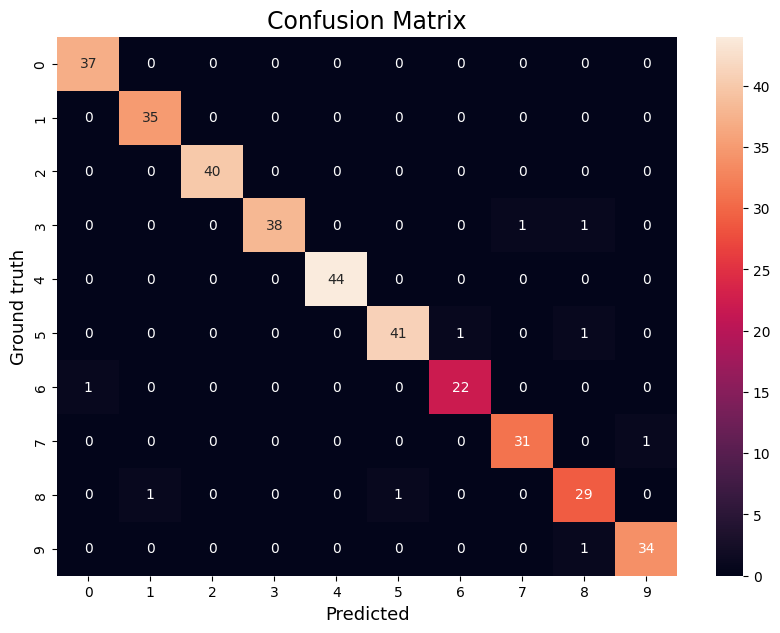

In [47]:
# code for confusion matrix visualization
import seaborn as sn

plt.figure(figsize = (10,7)) # generate a figure window
sn.heatmap(cm, annot=True) # generate a heatmap with the content of variable cm (the confusion matrix). annot=True means show the colorbar beside the heat map
plt.xlabel('Predicted', fontsize=13) # label the x-axis of the heatmap
plt.ylabel('Ground truth', fontsize=13) # label the y-axis of the heatmap
plt.title('Confusion Matrix',fontsize=17) # label the title of the heatmap

#### Generate the classification report

In [48]:
from sklearn.metrics import classification_report

'''
generate the classification report of the trained model using: 
1) the samples in Y_test (ground truths in test set), 
2) the predictions over the samples in X_test (features in test set),
3) the name of all labels/categories available in the dataset as a list in ascending order
'''
cr = classification_report(Y_test, Y_predicted, labels=name_categorical_label_list_sorted)
# show the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        40
           3       1.00      0.95      0.97        40
           4       1.00      1.00      1.00        44
           5       0.98      0.95      0.96        43
           6       0.96      0.96      0.96        23
           7       0.97      0.97      0.97        32
           8       0.91      0.94      0.92        31
           9       0.97      0.97      0.97        35

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

